In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

>> #### Import Libraries

In [3]:
import dvc.api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import sys, os

>> #### Import required Modules

In [4]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from load_data import LoadData
from plot import Plot
from overview import Overview
from preprocessing import PreProcess

Initialize loaddata

In [5]:
loader = LoadData()
plot = Plot()

Load data from csv file using Dvc

In [5]:
# Get URL from DVC
data_path = '../data/data.csv'
repo = 'https://github.com/jedisam/Causal_inference/'
version = 'bee80042c3c966ec98d90c247a8ccac0e5fd8aca'

In [ ]:
# Load train data from dvc using the dvc.api.Dataset class
data_url = dvc.api.get_url(
    path=data_path,
    repo=repo,
    rev=version
)

In [6]:
data = loader.read_csv("../data/data.csv")

In [6]:
overview = Overview(data)
prep = PreProcess(data)

In [8]:
report = plot.plot_profile(data, '../reports/train_df_profile')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report

In [8]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [9]:
data.shape
# number of data points
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 569 rows and 33 columns


Missing Value Percentage

In [10]:
# Count missing values
overview.percent_missing(data)

The dataset contains 3.03 % missing values.


In [11]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Duplicates check

In [12]:
# Duplicate check 
overview.number_of_duplicates(data)

(0, 33)


There are no duplicates

In [13]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

For some of the columns, the mean value is very different from the median (50%) value which means there is an outlier

In [14]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Column types

In [16]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Data Skewness

    Skewness is a measure of the asymmetry of the distribution of a dataset's values.

In [17]:
overview.get_skewness(data)

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

Handle missing values 

Remove unnecessary columns 

In [18]:
len(data.columns)

33

In [68]:
data = prep.df_drop_columns(data)

In [69]:
len(data.columns)

32

Missing Percentage after removing unnecessary columns

In [70]:
# Count missing values
overview.percent_missing(data)

The dataset contains 0.0 % missing values.


In [23]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Drop ID column which is not required

In [18]:
data = prep.drop_column(data, 'id')

In [19]:
len(data.columns)

32

>> #### Distribution of the data

Hist plot of means

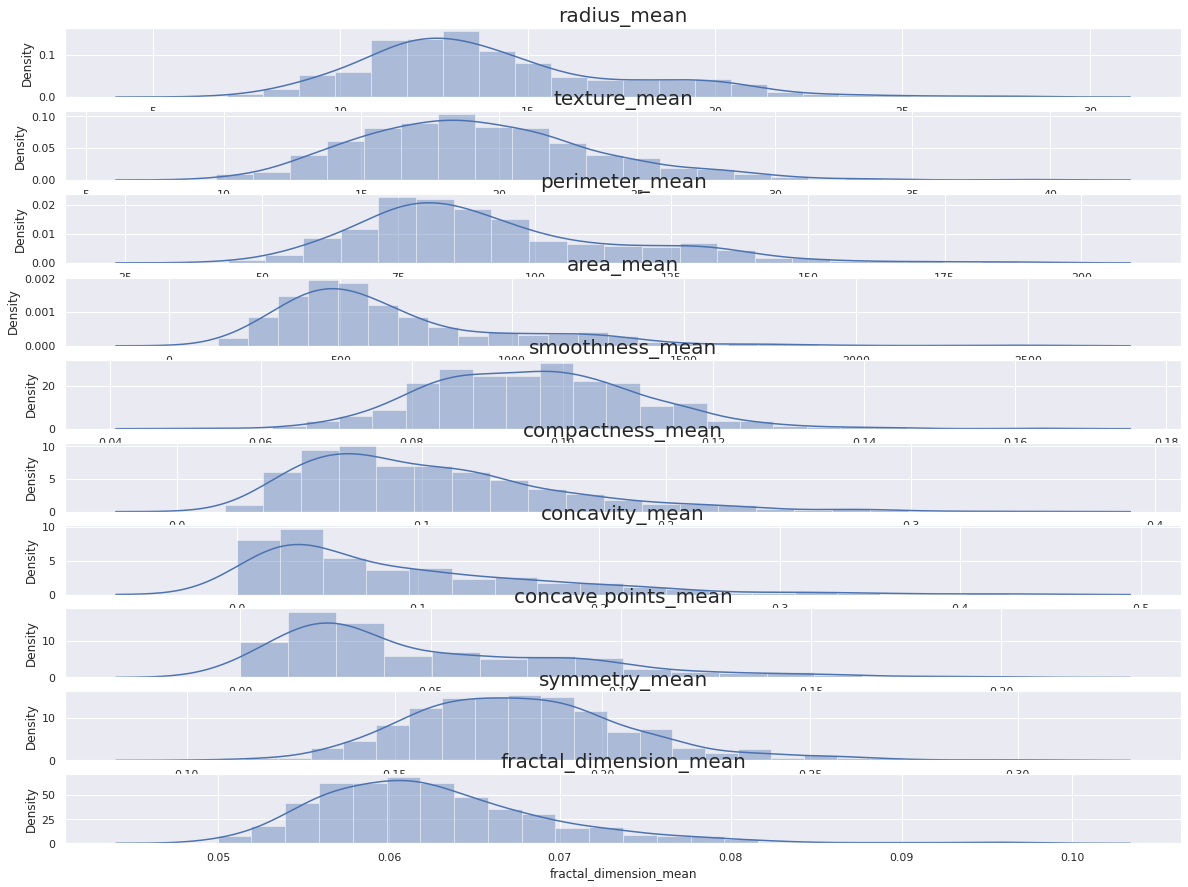

In [26]:
ms = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plot.plot_hist_subplot(data, ms)

Hist plot of _se

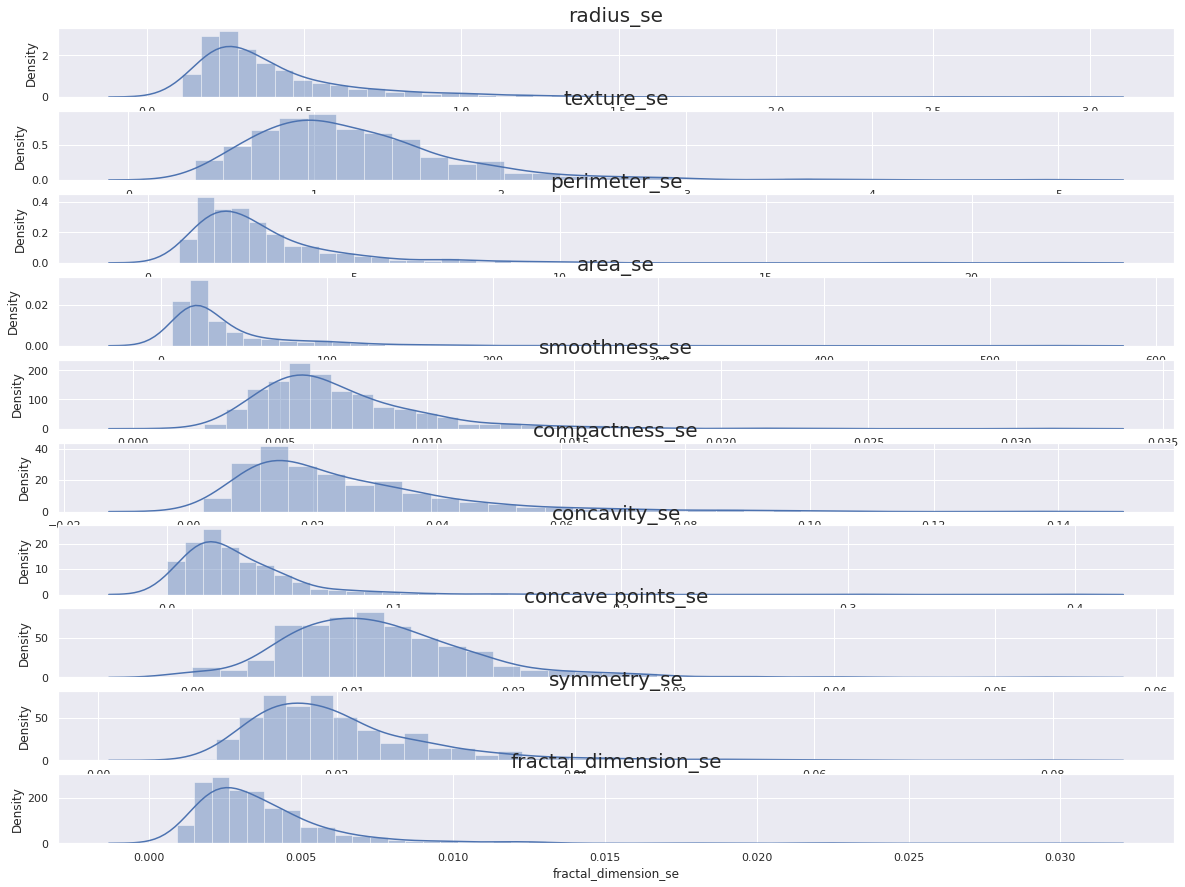

In [27]:
se =  ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']
plot.plot_hist_subplot(data, se)

Hist plots of _worst

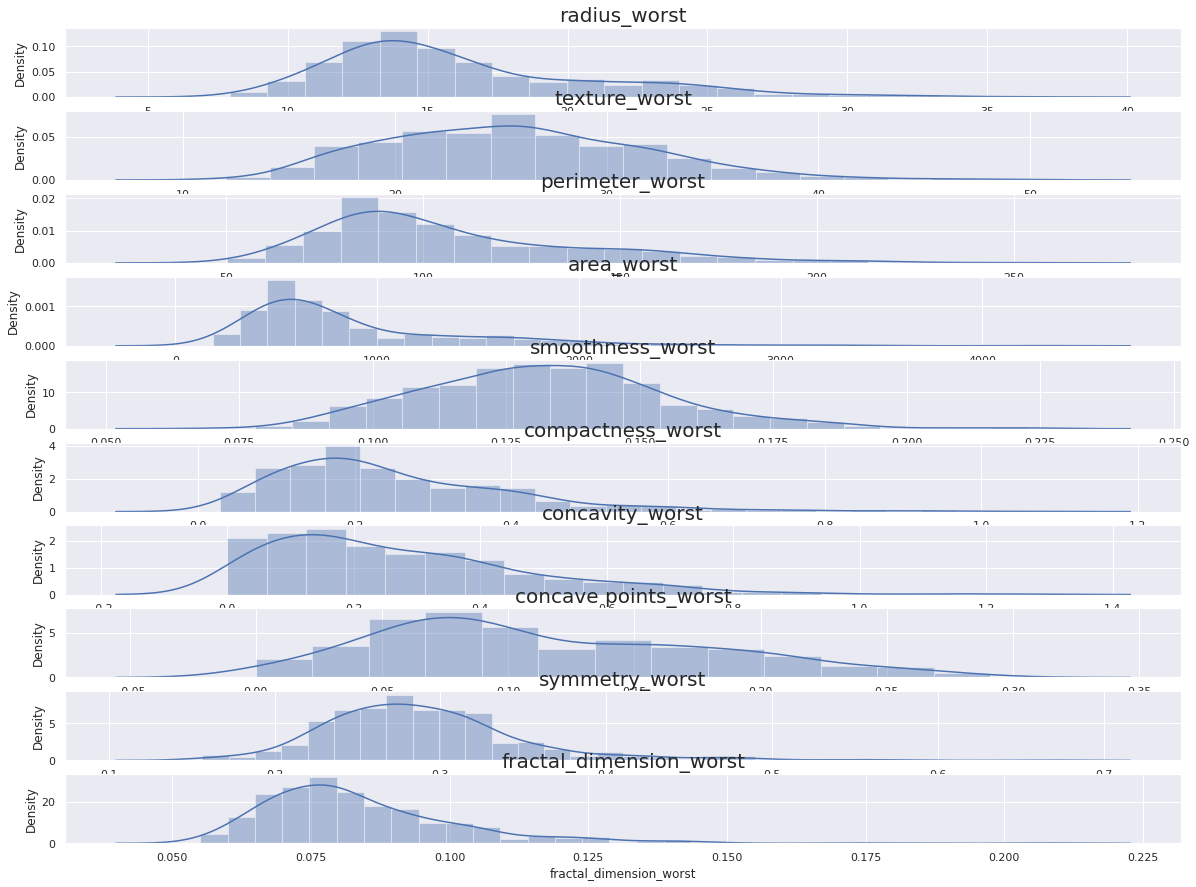

In [28]:
wst = [ 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
plot.plot_hist_subplot(data, wst)

In [29]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

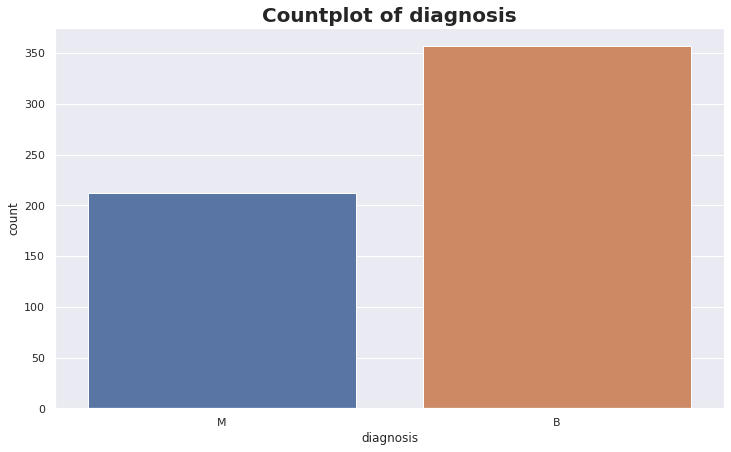

In [21]:
plot.plot_count(data, 'diagnosis')

Malignant and Benign number figures

In [22]:
plot.plot_pie(data['diagnosis'], ["Benign", "Malignant"])

Most of the diagnosis data is Benign and about 200 records are Malignant

ms,se,wst

In [33]:
data['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
msp = pd.concat([data[ms], data['diagnosis']], axis=1)

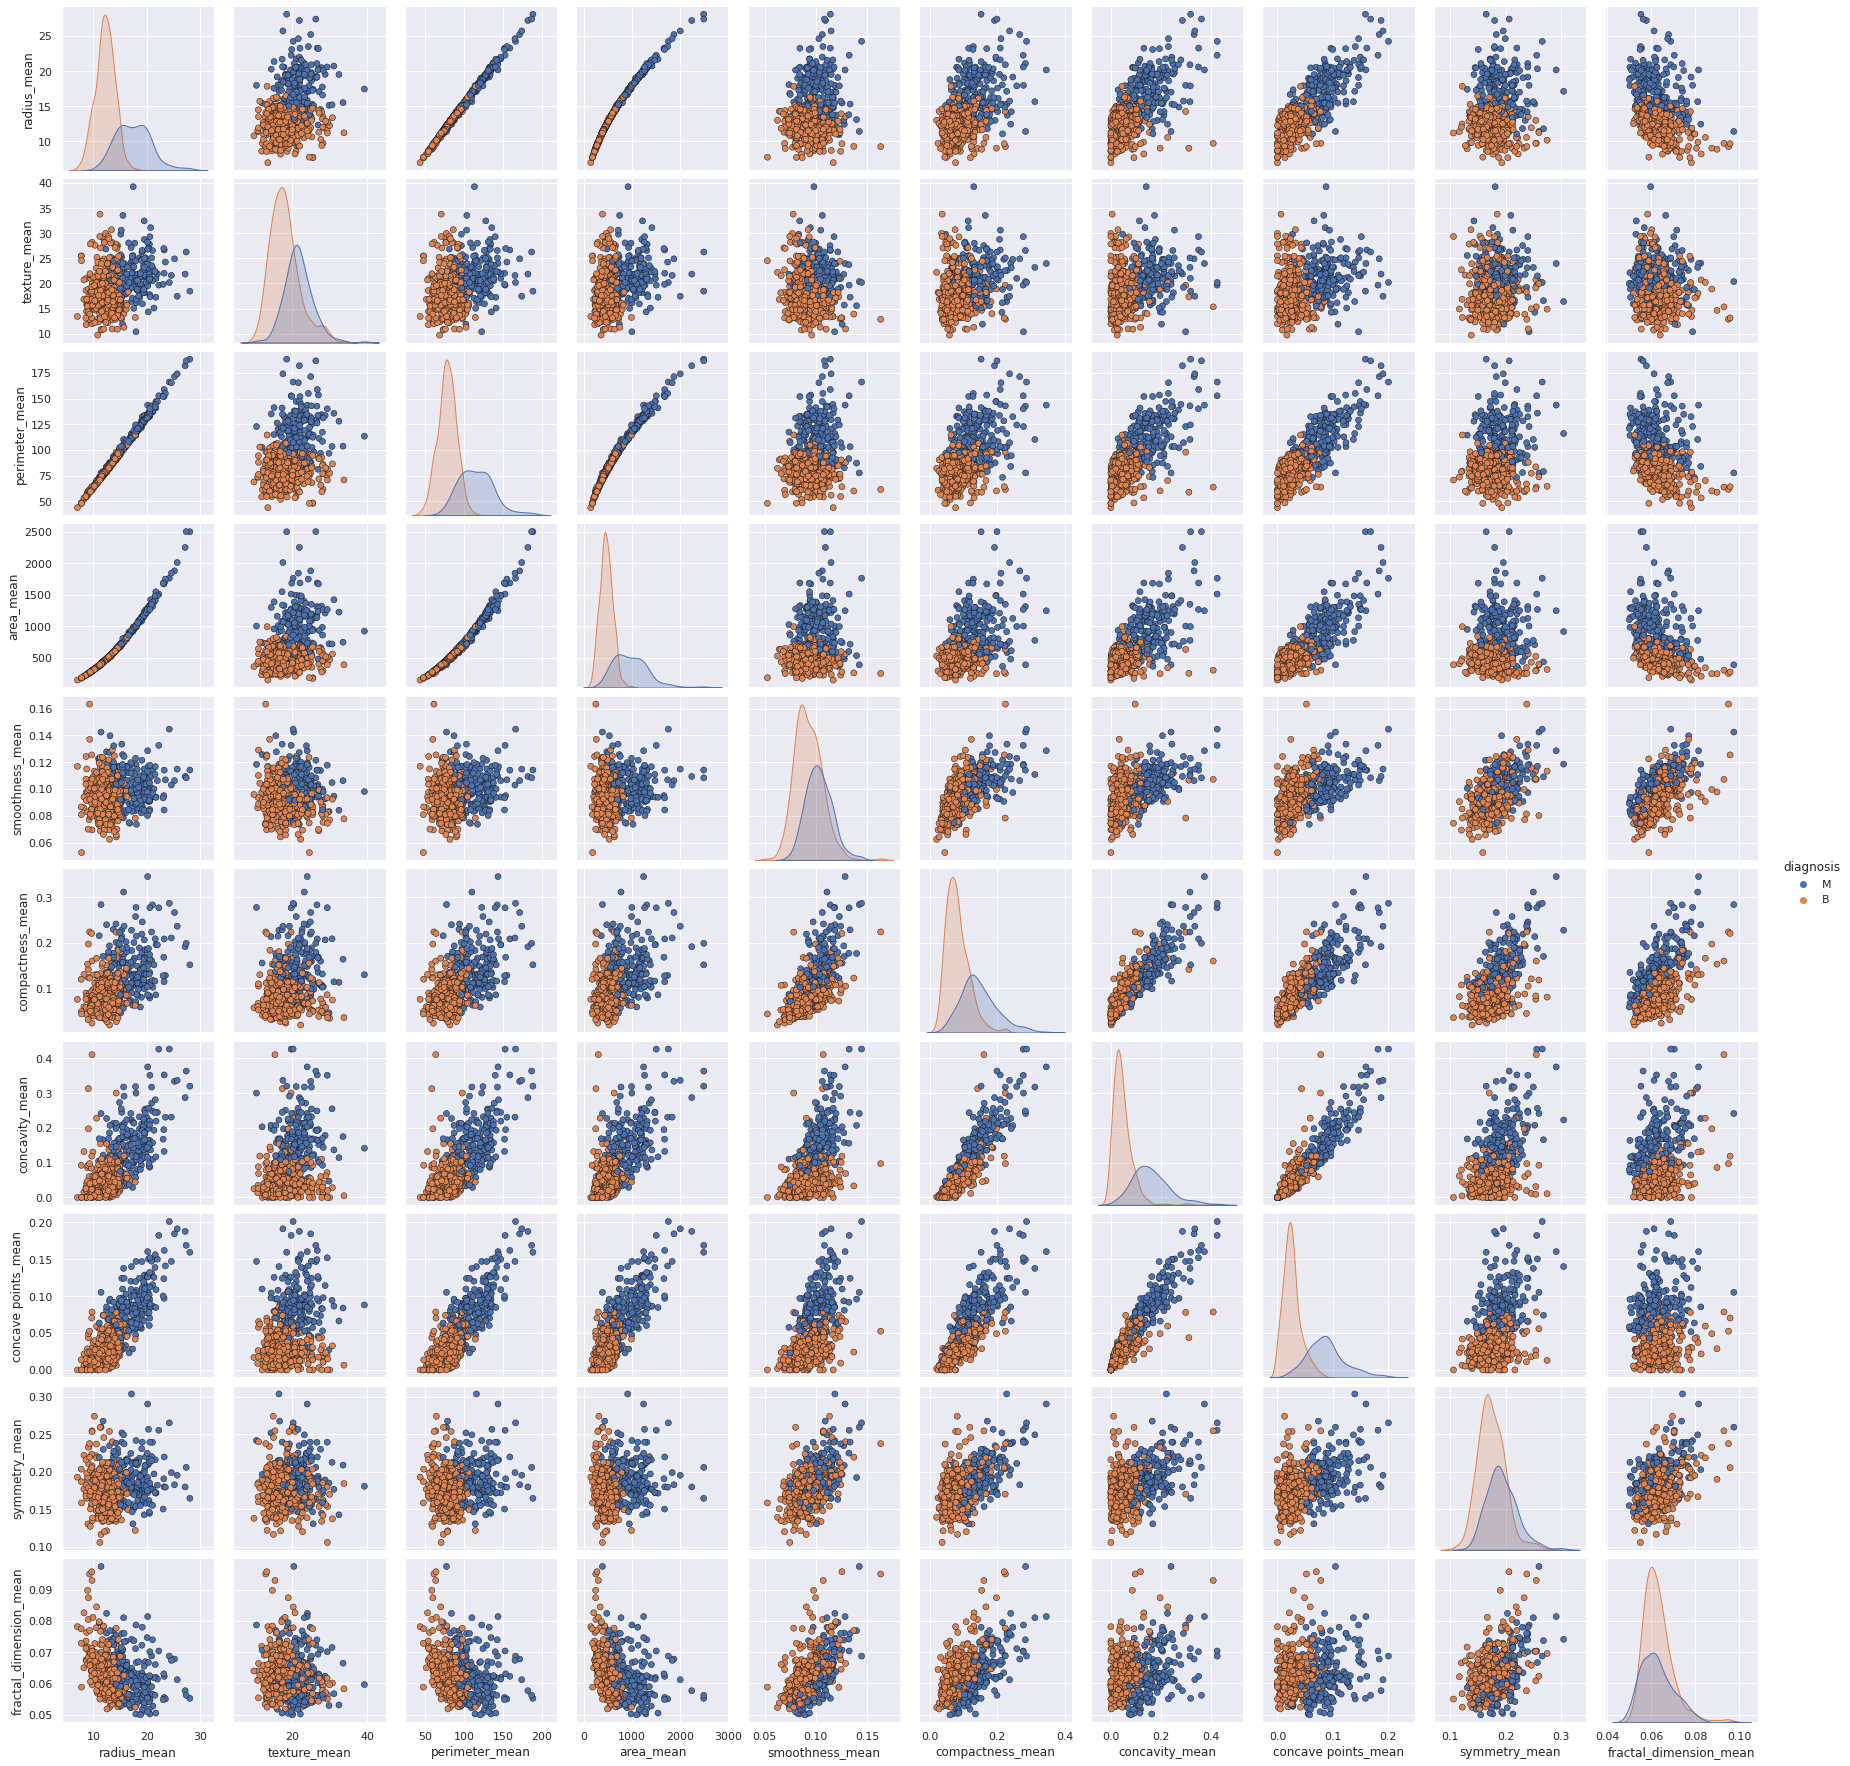

In [40]:
sns.pairplot(msp, hue = "diagnosis", plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

In [46]:
sep = pd.concat([data[se], data['diagnosis']], axis=1)

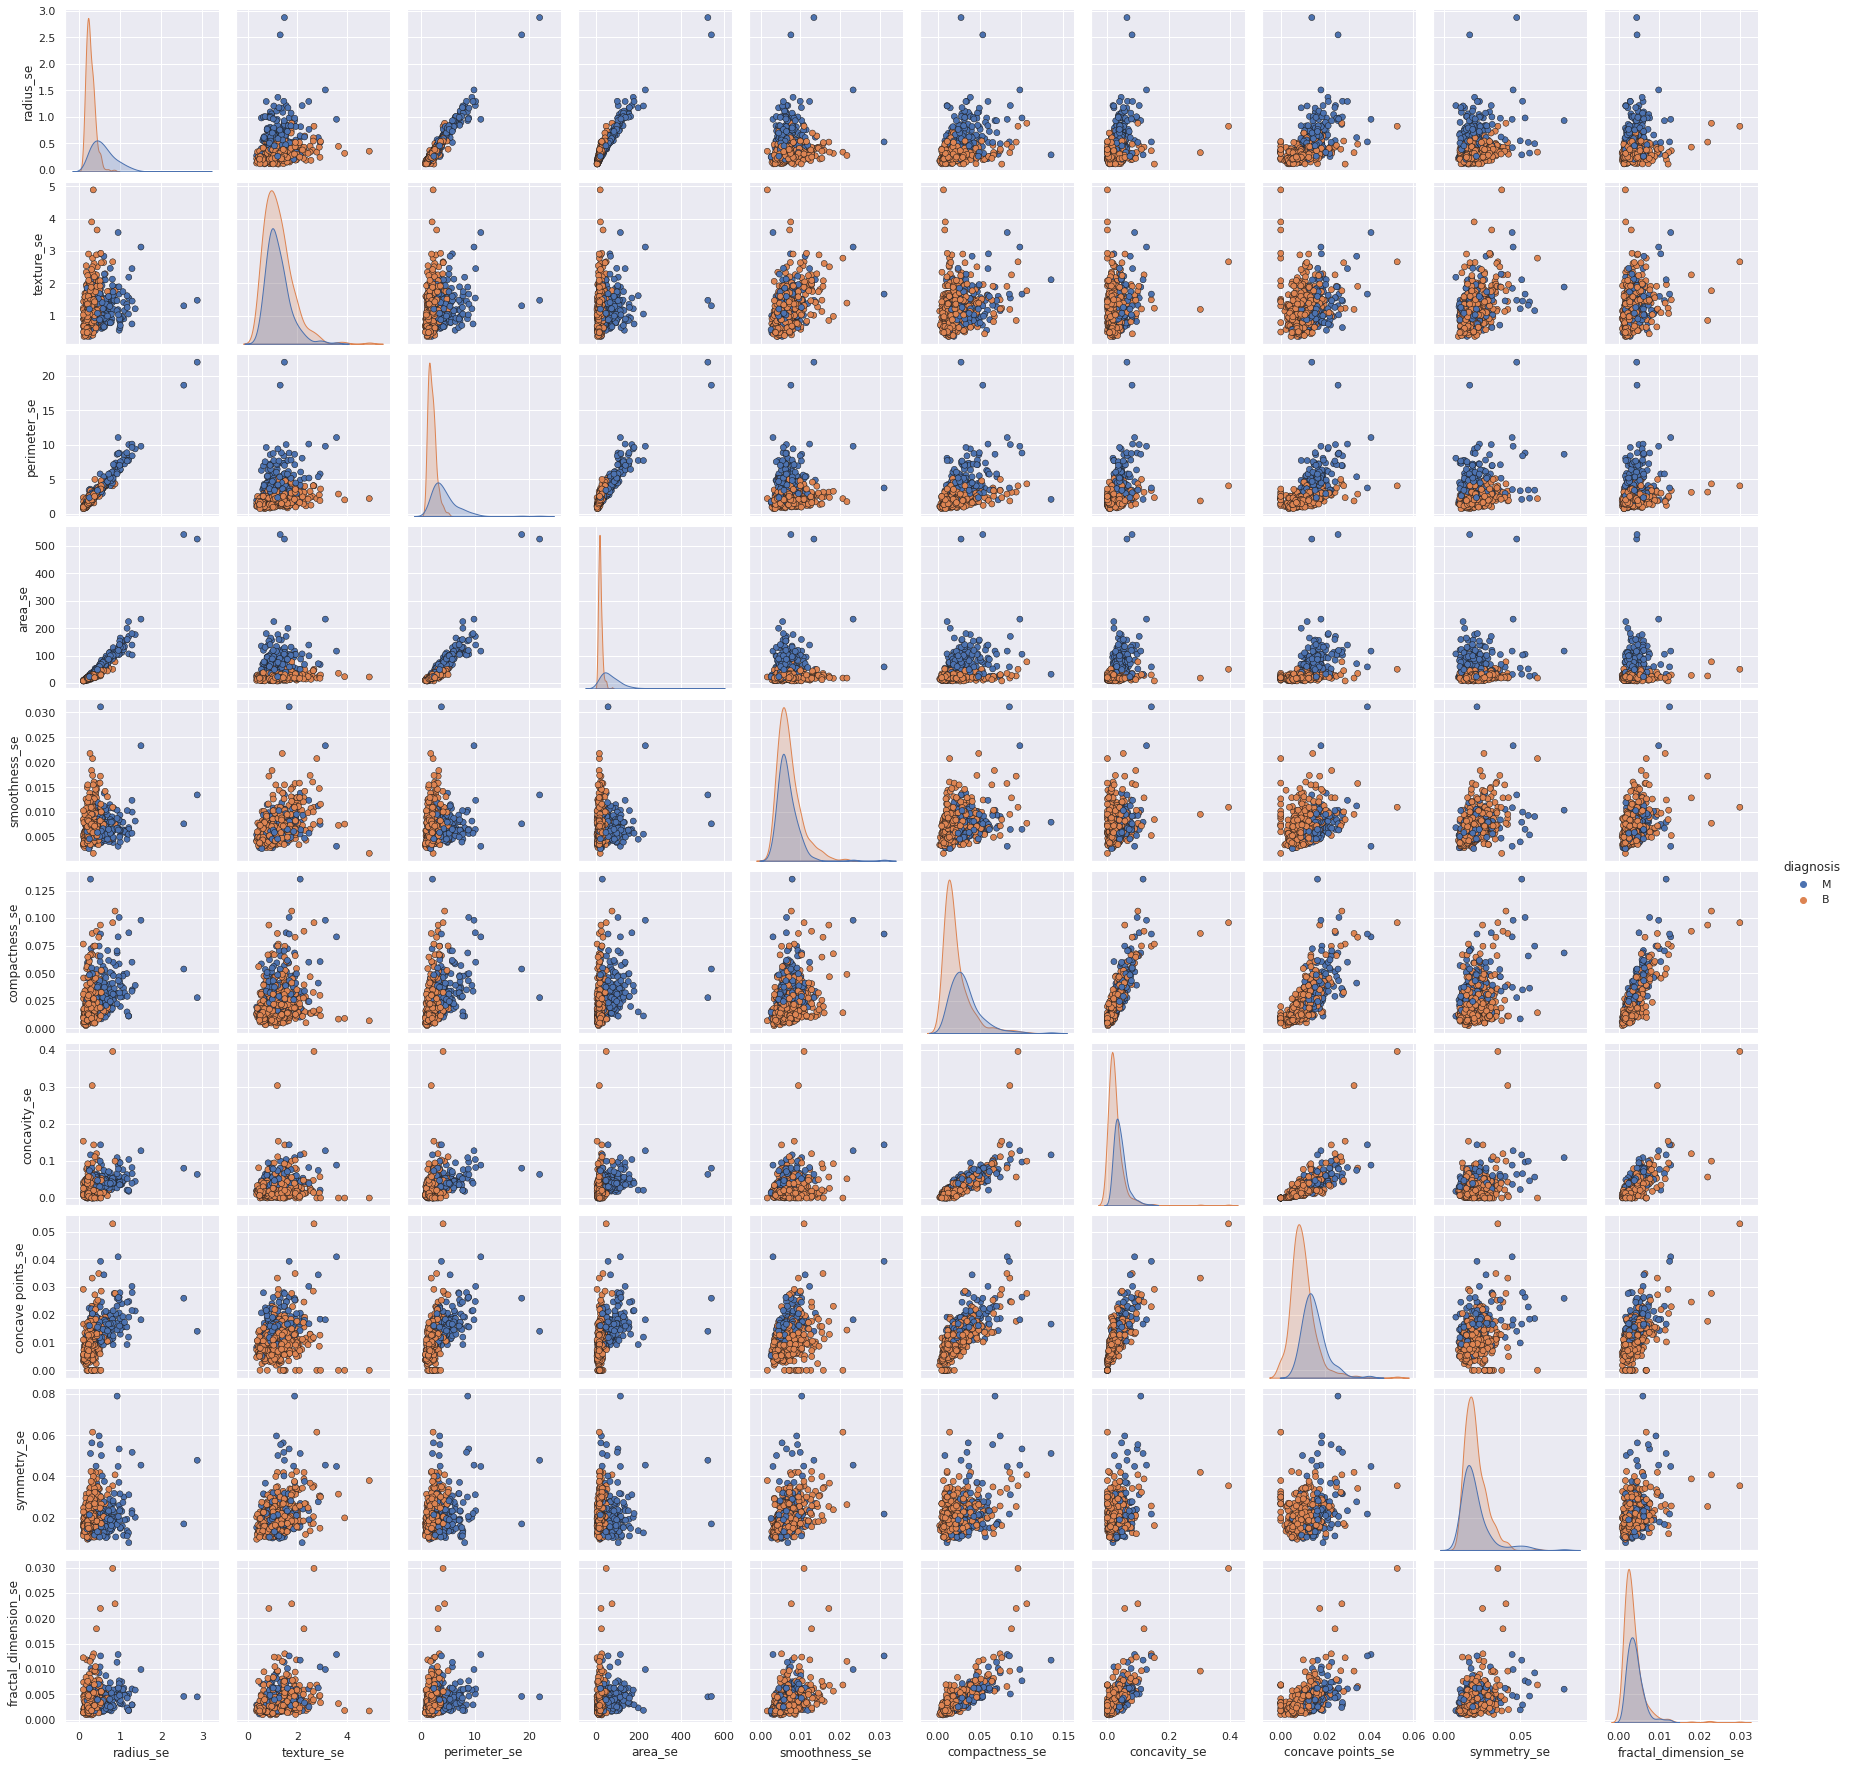

In [47]:
sns.pairplot(sep, hue = "diagnosis", plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

In [48]:
wstp = pd.concat([data[wst], data['diagnosis']], axis=1)

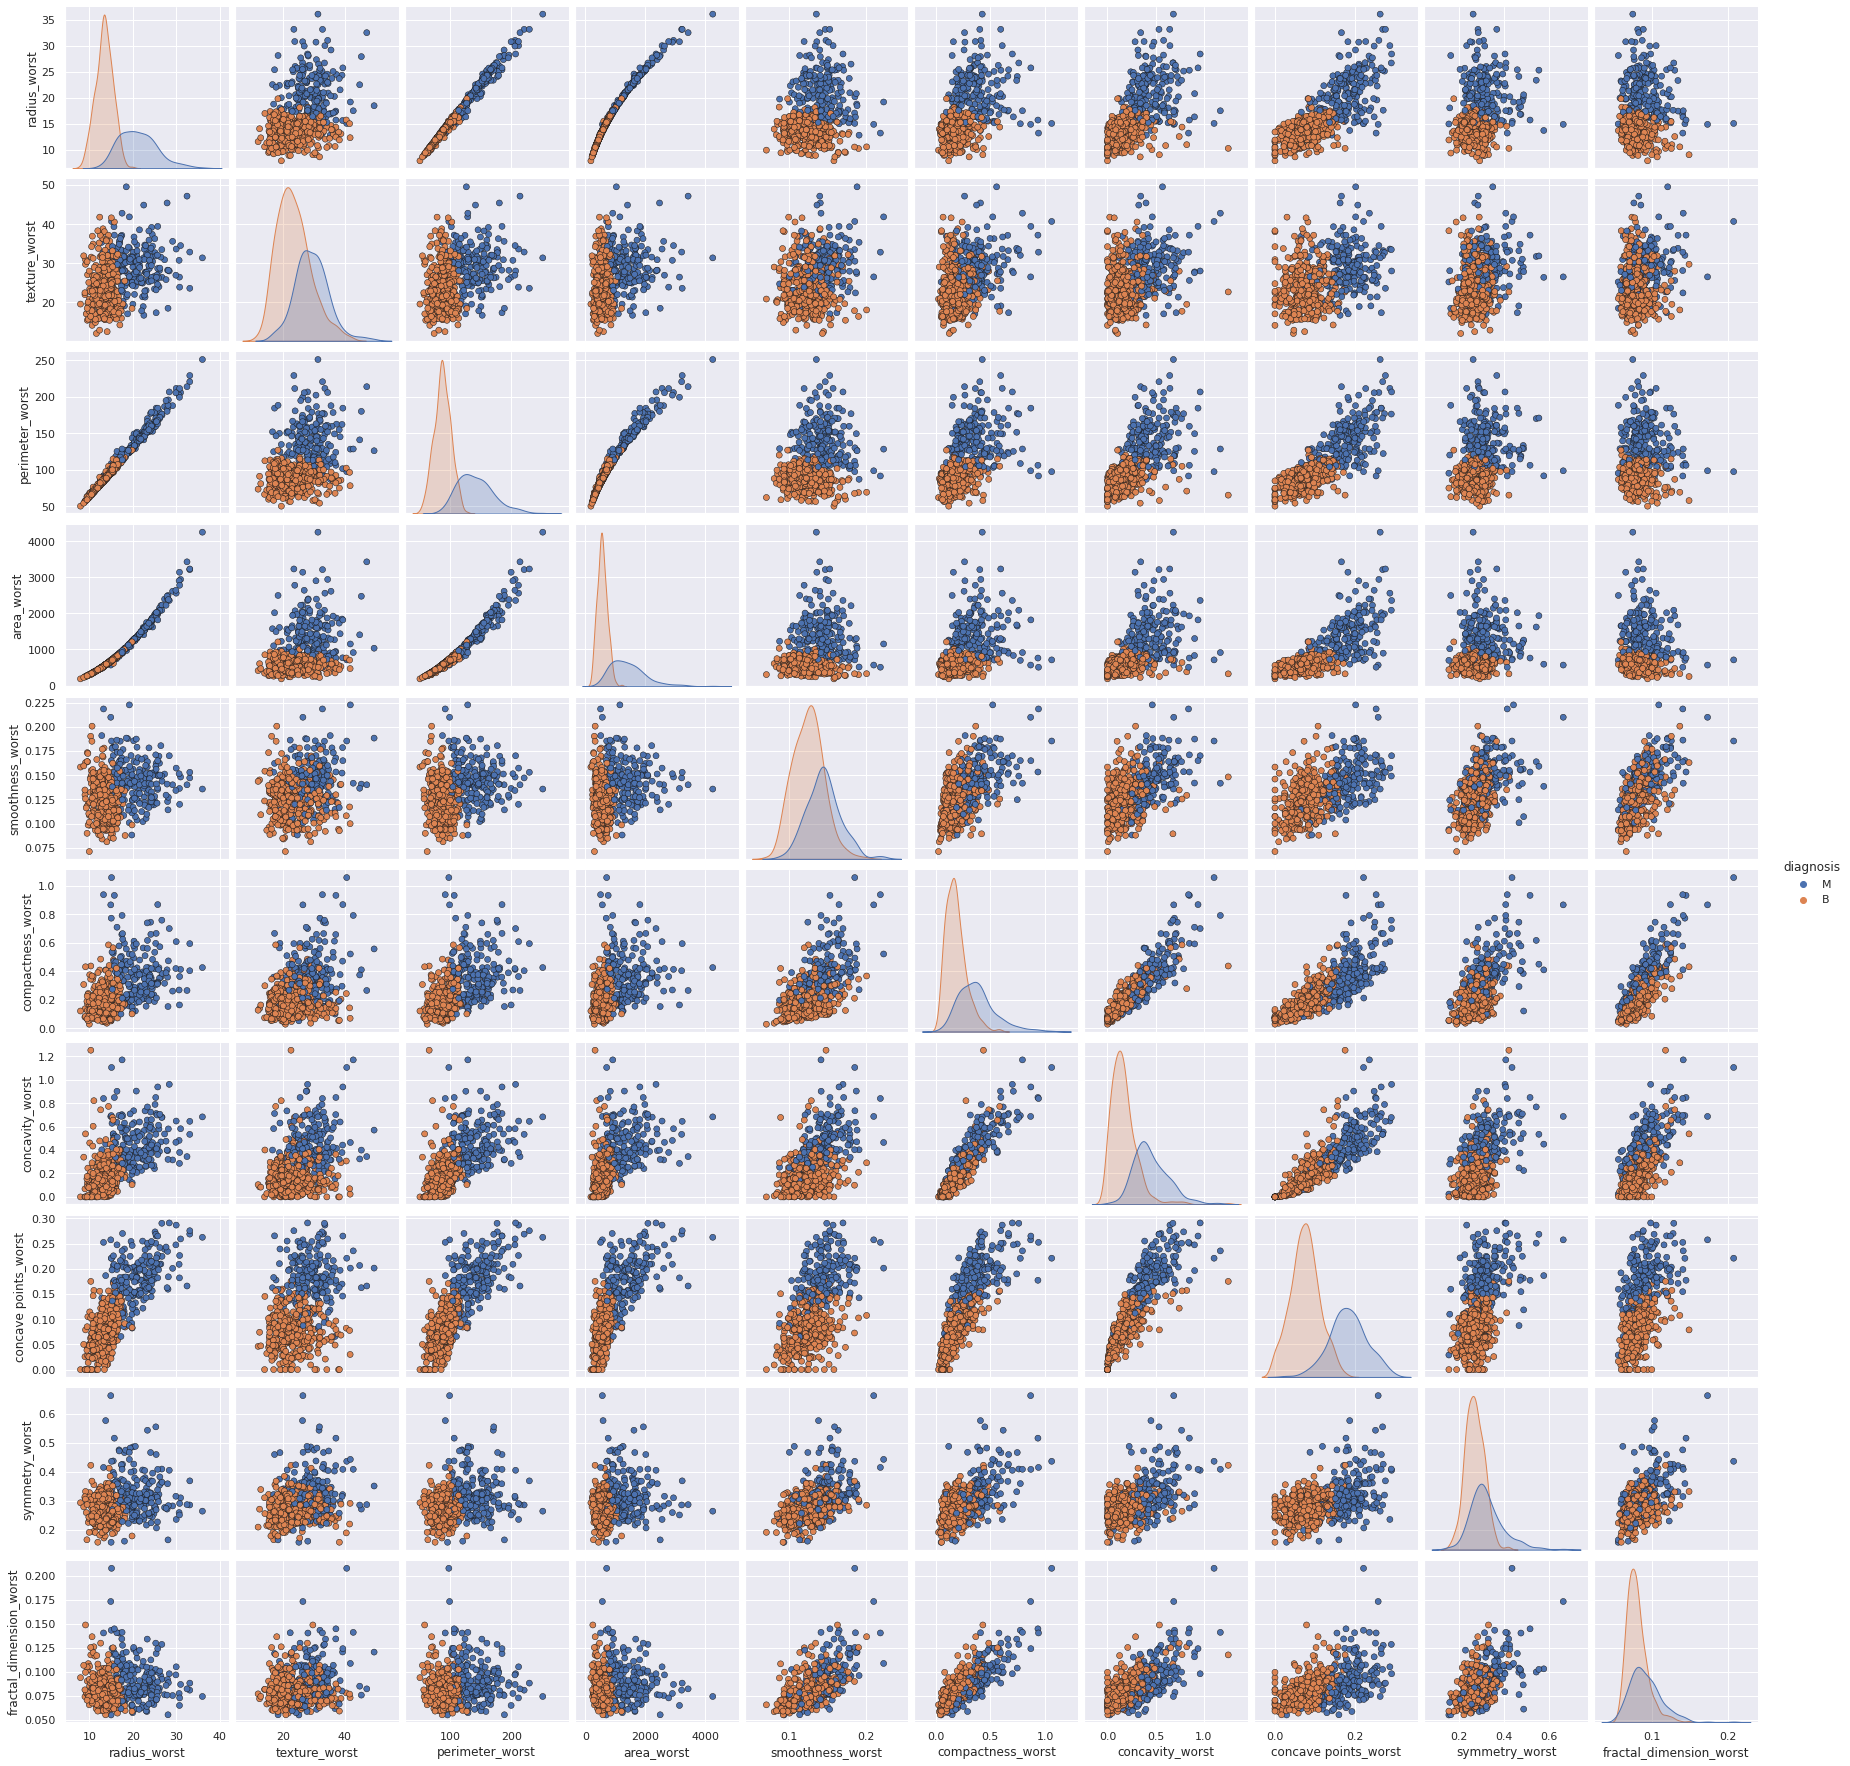

In [49]:
sns.pairplot(wstp, hue = "diagnosis", plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

It can be seen that radius, perimeter, area have positive correlation with malignancy

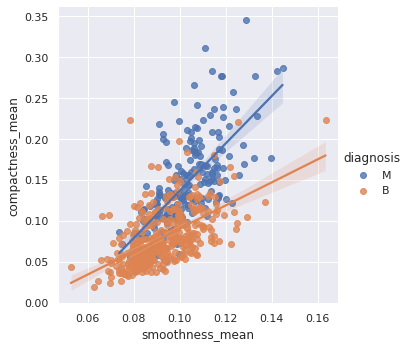

In [50]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', data = data, hue = 'diagnosis')

In [53]:
corr_feats = prep.select_correlated_variables(data, 0.7)

In [54]:
corr_feats

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_mean  texture_se  smoothness_se  \
0           0.2419                 0.07871      0.9053       0.006399   
1           0.1812                 0.05667      0.7339       0.005225   
2           0.2069                 0.05999      0.7869       0.006150   
3           0.2597                 0.09744      1.1560       0.009110   
4           0.1809                 0.05883      0.7813       0.011490   
..             ...                     ...         ...            ...   
564         0.1726                 0.05623      1.2560       0.010300   
565         0.1752                 0.05533      2.4630       0.005769   
566         0.1590                 0.05648      1.0750       0.005903   
567         0.2397                 0.07016      1.5950       0.006522   
568         0.1587                 0.05884      1.4280       0.007189   

     symmetry_se  symmetry_worst  
0        0.03003          0.4601  
1        0.01389          0.2750  
2        0.02250          0.3613  
3        0.05963          0.6638  
4        0.01756          0.2364  
..           ...             ...  
564      0.01114          0.2060  
565      0.01898          0.2572  
566      0.01318          0.2218  
567      0.02324          0.4087  
568      0.02676          0.2871  

[569 rows x 10 columns]

LabelEncoding

In [32]:
categorical_columns = ['diagnosis']

# Label encoding
label_encoded_columns = prep.label_encode(data, categorical_columns)

In [33]:
data.drop(categorical_columns, axis=1, inplace=True)

# Merge DataFrames
data = pd.concat([data, label_encoded_columns], axis=1)

Correlation Matrix

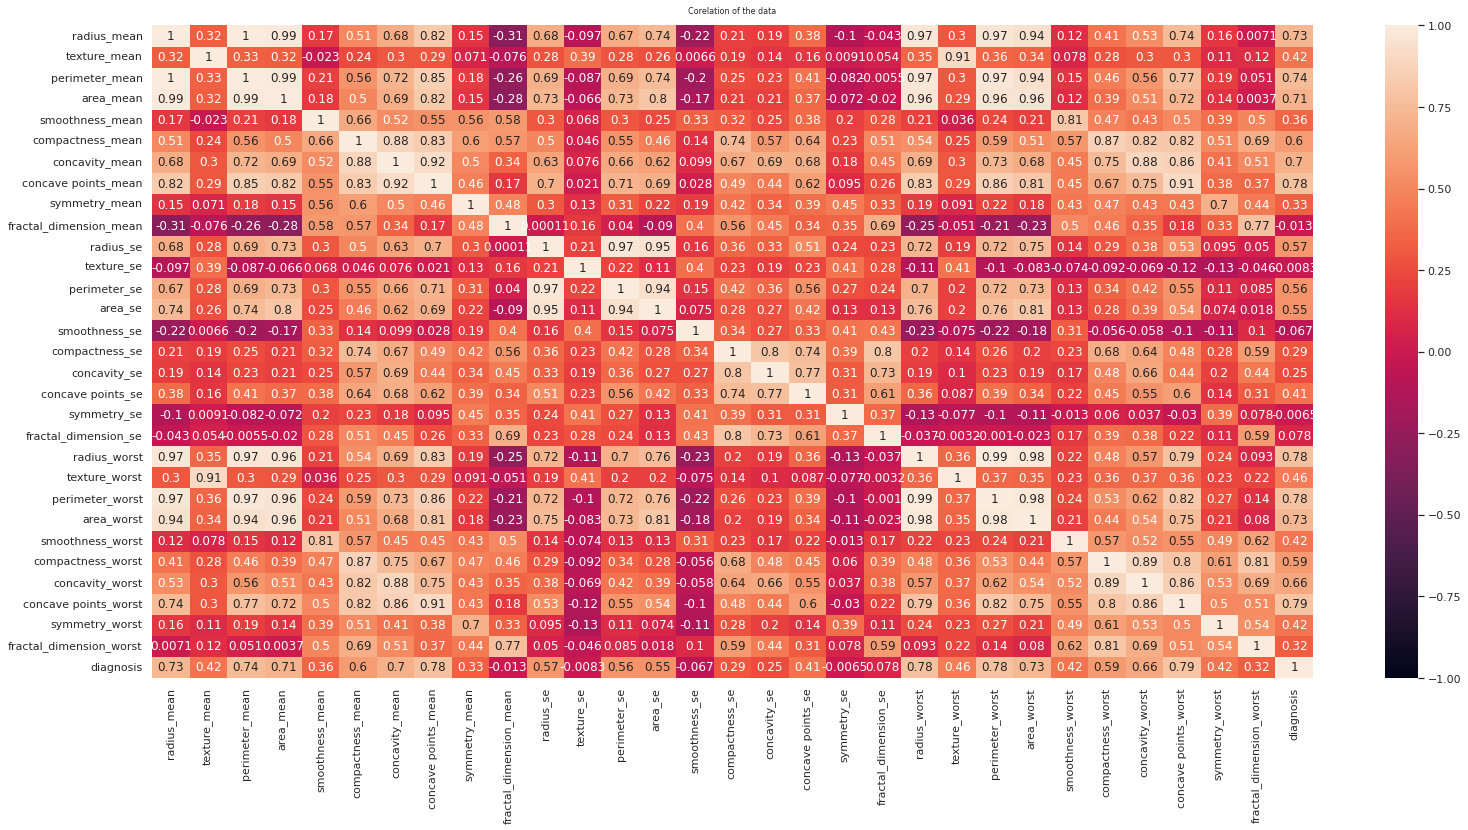

In [30]:
plot.plot_heatmap(data, "Corelation of the data")

>> #### Outlier Detection & Handling

In [76]:
plot.outliers_plot(data, data.columns[5:11])

Convavity_mean has a very high value which means there is an outlier

In [81]:
plot.outliers_plot(data, data.columns[19:25])

In [24]:
plot.outliers_plot(data, data.columns[25:31])

##### Handle Outliers

In [27]:
data = prep.replace_outliers_iqr(data, columns=['concavity_mean', 'compactness_mean', 'concave points_mean', 'area_se', 'compactness_worst', 'concavity_worst', 'symmetry_worst'])

Outlier plot after removing the outlier

In [31]:
plot.outliers_plot(data, data.columns[5:11])

In [34]:
data.to_csv('../data/data_clean.csv', index=False)